3
4 -1 -1
-2 6 1
-1 1 7
3 9 -6
Solution x(k): [ 1.  2. -1.]
Total approximation error for each element in x(k): [2.1505813167606567, 0.2961571237537828, 0.05936912586070326, 0.006347232716231774, 0.0004844193938938237, 2.618705578183461e-05, 7.318805725727796e-07, 9.892029538528053e-08, 1.4781232956525084e-08, 1.38095322735294e-09, 9.409803617817258e-11, 4.2569257704542064e-12, 1.2247289819813308e-13, 2.8817078515436704e-14, 3.4755478145461824e-15, 3.3306690738754696e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


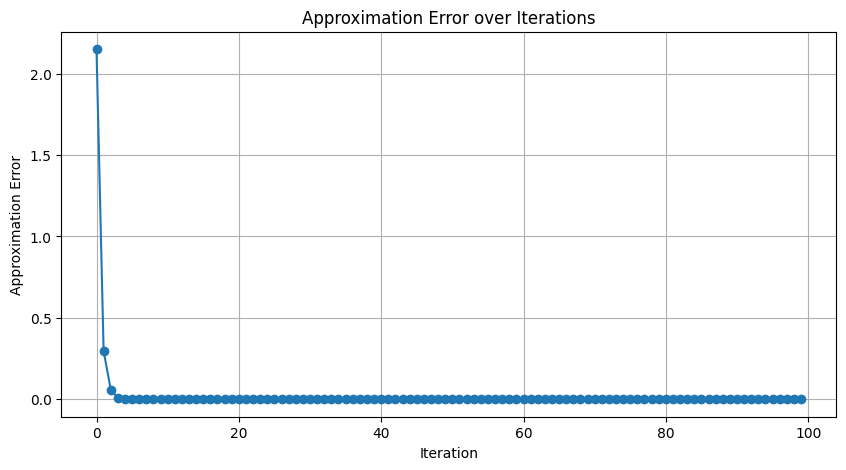

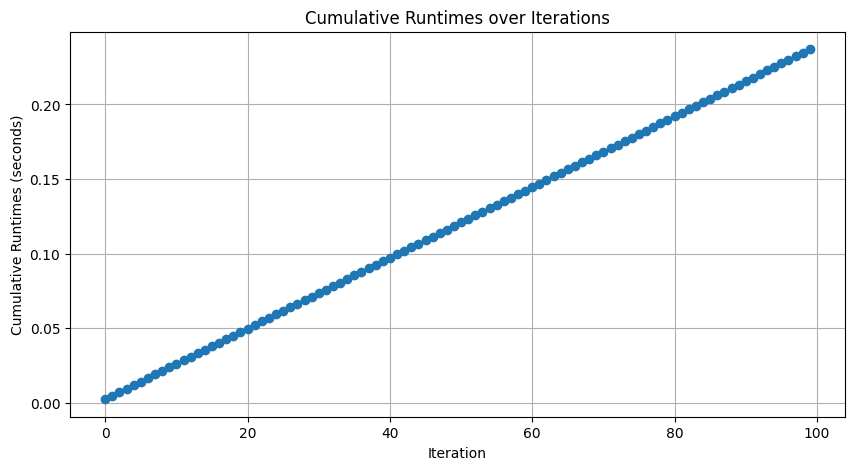

Solution x(k) with matrix operations: [ 1.  2. -1.]
Total approximation error for each element in x(k): [2.1505813167606567, 0.2961571237537826, 0.05936912586070334, 0.006347232716231732, 0.0004844193938939084, 2.6187055782017438e-05, 7.31880572607048e-07, 9.89202949628757e-08, 1.4781232967471559e-08, 1.3809532141867845e-09, 9.409803617817258e-11, 4.2569257704542064e-12, 1.2249886115429241e-13, 2.871531276399243e-14, 3.4255373250283743e-15, 3.3306690738754696e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


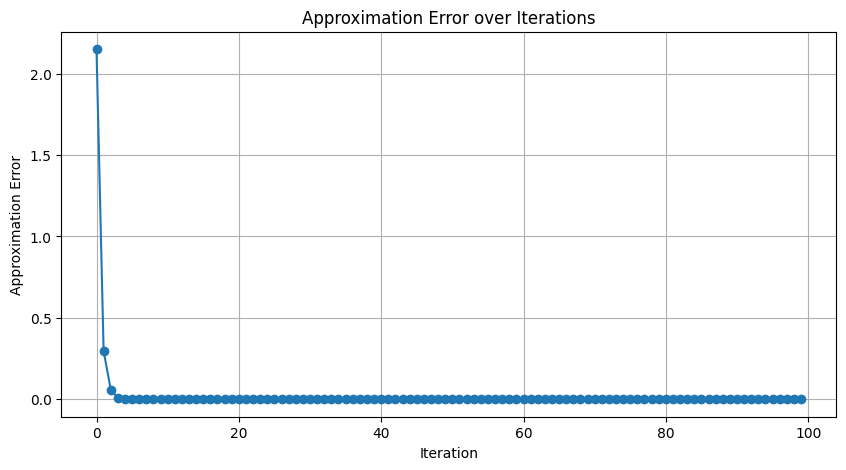

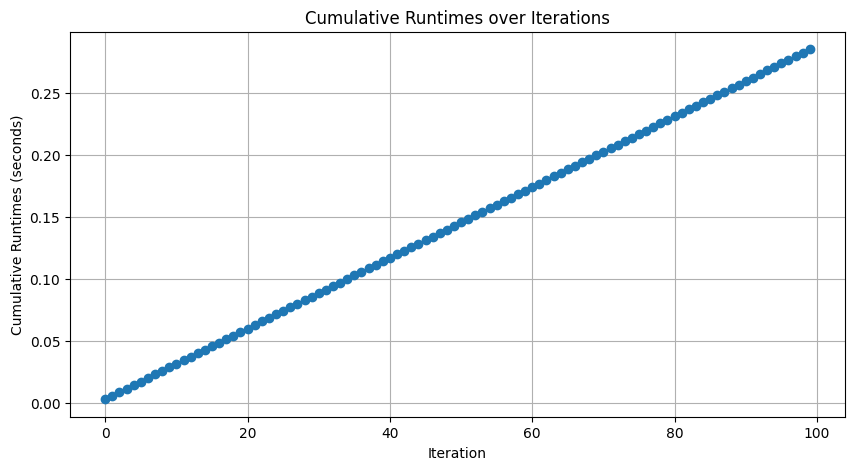

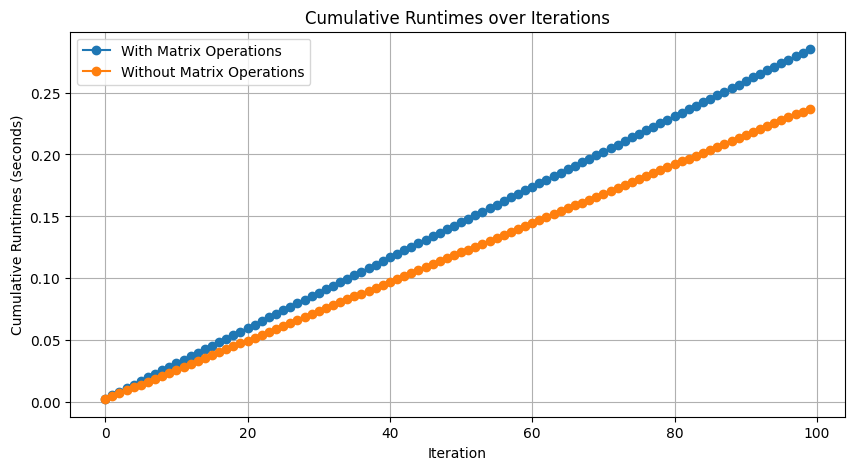

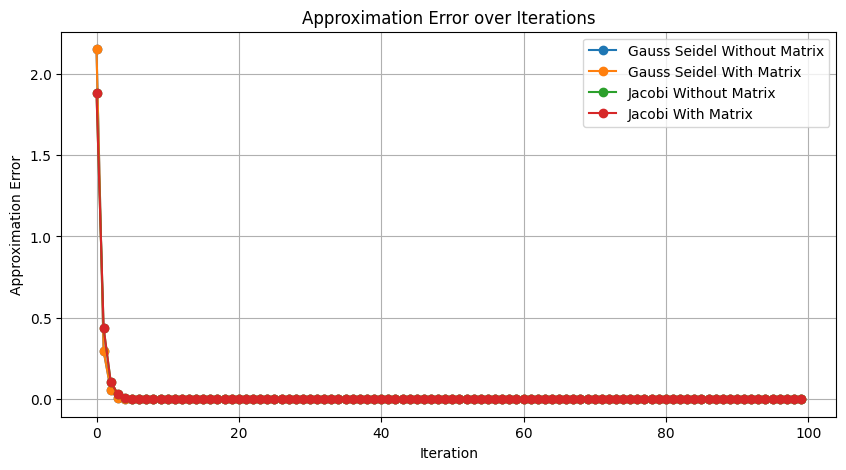

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Function to solve a linear system using Gauss-Seidel method
def gauss_seidel(A, b, initial_guess, max_iterations):
    n = len(b)
    x = initial_guess.copy()
    errors = []

    for iteration in range(max_iterations):
        new_x = np.zeros_like(x)

        for i in range(n):
            sigma = np.dot(A[i, :i], new_x[:i]) + np.dot(A[i, i+1:], x[i+1:])
            new_x[i] = (b[i] - sigma) / A[i, i]

        error = np.linalg.norm(new_x - x)
        errors.append(error)
        x = new_x

    return x, errors
# Function to solve a linear system using Gauss-Seidel method using matrix
def gauss_seidel_matrix(A, b, initial_guess, max_iterations):
    n = len(b)
    x = initial_guess.copy()
    errors = []

    L = np.tril(A)
    U = A - L
    L_inv = np.linalg.inv(L)

    for iteration in range(max_iterations):
        x_new = np.dot(L_inv, b - np.dot(U, x))
        error = np.linalg.norm(x_new - x)
        errors.append(error)
        x = x_new

    return x, errors

def jacobi_method(A, b, x0,max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []

    for _ in range(max_iterations):
        x_new = np.zeros_like(x)

        for i in range(n):
            x_new[i] = (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

        error = np.linalg.norm(x_new - x)
        errors.append(error)
        x = x_new

    return x, errors

def jacobi_matrix(A, b, x0, max_iterations):
    n = len(b)
    x = x0.copy()
    errors = []

    D = np.diag(np.diag(A))
    inv_D = np.linalg.inv(D)
    R = A - D

    for _ in range(max_iterations):
        x_new = np.dot(inv_D, b - np.dot(R, x))

        error = np.linalg.norm(x_new - x)
        errors.append(error)
        x = x_new

    return x, errors

# Input
n = int(input())
A = np.zeros((n, n))
for i in range(n):
    A[i] = list(map(float, input().split()))

b =  list(map(float, input().split()))

initial_guess = np.zeros(n)
max_iterations = 100

# Solve using Gauss-Seidel method
start_time = time.time()
solution, errors = gauss_seidel(A, b, initial_guess, max_iterations)
end_time = time.time()

# Solve using Gauss-Seidel method with matrix operations
start_time_matrix = time.time()
solution_matrix, errors_matrix = gauss_seidel_matrix(A, b, initial_guess, max_iterations)
end_time_matrix = time.time()

# Solve using Jacobi method
jacobi_solution, jacobi_errors = jacobi_method(A, b, initial_guess, max_iterations)
# Solve using Jacobi method with matrix operations
jacobi_matrixsolution, jacobi_matrix_errors = jacobi_matrix(A, b, initial_guess, max_iterations)

# Generate output
print("Solution x(k):", solution)
print("Total approximation error for each element in x(k):", errors)

# Plot approximation errors
plt.figure(figsize=(10, 5))
plt.plot(errors, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Approximation Error")
plt.title("Approximation Error over Iterations")
plt.grid(True)
plt.show()

# Plot cumulative runtimes over iterations
runtimes = [end_time - start_time] * len(errors)
runtimes_matrix = [end_time_matrix - start_time_matrix] * len(errors_matrix)
for i in range(1, len(runtimes)):
    runtimes_matrix[i] = runtimes_matrix[i-1] + (end_time_matrix - start_time_matrix)
    runtimes[i] = runtimes[i-1] + (end_time - start_time)

plt.figure(figsize=(10, 5))
plt.plot(runtimes, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Cumulative Runtimes (seconds)")
plt.title("Cumulative Runtimes over Iterations")
plt.grid(True)
plt.show()

print("Solution x(k) with matrix operations:", solution_matrix)
print("Total approximation error for each element in x(k):", errors_matrix)


# Plot approximation errors for gauss-seidel with matrix
plt.figure(figsize=(10, 5))
plt.plot(errors_matrix, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Approximation Error")
plt.title("Approximation Error over Iterations")
plt.grid(True)
plt.show()

# Plot cumulative runtimes over iterations for matrix
plt.figure(figsize=(10, 5))
plt.plot(runtimes_matrix, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Cumulative Runtimes (seconds)")
plt.title("Cumulative Runtimes over Iterations")
plt.grid(True)
plt.show()

# Plot cumulative runtimes over iterations comparison
plt.figure(figsize=(10, 5))
plt.plot(runtimes_matrix, label="With Matrix Operations", marker='o')
plt.plot(runtimes, label="Without Matrix Operations", marker='o')
plt.xlabel("Iteration")
plt.ylabel("Cumulative Runtimes (seconds)")
plt.title("Cumulative Runtimes over Iterations")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(errors,label="Gauss Seidel Without Matrix", marker='o')
plt.plot(errors_matrix,label="Gauss Seidel With Matrix", marker='o')
plt.plot(jacobi_errors,label="Jacobi Without Matrix", marker='o')
plt.plot(jacobi_matrix_errors,label="Jacobi With Matrix", marker='o')
plt.xlabel("Iteration")
plt.ylabel("Approximation Error")
plt.title("Approximation Error over Iterations")
plt.legend()
plt.grid(True)
plt.show()